In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import all the files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

## Read Data

In [3]:
df = pd.read_csv("train.csv")
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

## Data Cleansing & EDA

In [4]:
print (df.shape)
print (df.info(verbose = 1, null_counts=True))

(69999, 172)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296

In [5]:
# Understand the missing data

missing_data_percent = df.isnull().sum()/len(df)*100
pd.set_option('display.max_rows', None)

print (missing_data_percent)

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [6]:
# find the columns which have null value

cols = df.columns[df.isnull().any()].tolist()
cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou

In [7]:
## Start working on the null values

## Assume 0 for missing entries if not dates 
## It is safe to assume 0 because the customer may not be using that feature if no data. 
## Other mechanims such as average or median will skew the data
for ele in cols:
    if 'date' not in ele:
        df[ele] = df[ele].fillna(0)

In [8]:
# Once again check for missing data 

missing_data_percent = df.isnull().sum()/len(df)*100
pd.set_option('display.max_rows', None)

print (missing_data_percent)

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.000000
std_og_t2o_mou               0.000000
loc_ic_t2o_mou               0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                0.000000
loc_og_t2t_mou_6             0.000000
loc_og_t2t_mou_7             0.000000
loc_og_t2t_mou_8             0.000000
loc_og_t2m_m

### Univariate Analysis

In [9]:
# Creating a list of column names excluding 'churn_probability' and 'id'

# Original column list
col_list_original = df.columns.to_list()

# Removing 'churn_probability' and 'id' from the list
col_list_bar = [col for col in col_list_original if col not in ['churn_probability', 'id']]

## Create a separate data frame when churn_probability = 1
df_churn = df[df["churn_probability"] == 1]

In [10]:
## Get the descriptive metrics for all the parameters

## There are considerable outliers. When cleaning the data, the outliers around revenue and amounts will be removed.
df.describe().T

count          mean           std       min        25%  \
id                  69999.0  34999.000000  20207.115084     0.000  17499.500   
circle_id           69999.0    109.000000      0.000000   109.000    109.000   
loc_og_t2o_mou      69999.0      0.000000      0.000000     0.000      0.000   
std_og_t2o_mou      69999.0      0.000000      0.000000     0.000      0.000   
loc_ic_t2o_mou      69999.0      0.000000      0.000000     0.000      0.000   
arpu_6              69999.0    283.134365    334.213918 -2258.709     93.581   
arpu_7              69999.0    278.185912    344.366927 -1289.715     86.714   
arpu_8              69999.0    278.858826    351.924315  -945.808     84.095   
onnet_mou_6         69999.0    127.887939    295.115497     0.000      5.430   
onnet_mou_7         69999.0    128.754731    306.326345     0.000      4.910   
onnet_mou_8         69999.0    125.943607    304.990552     0.000      4.110   
offnet_mou_6        69999.0    191.010582    312.900706     0.000     28.790   
offnet_mou_7        69999.0    189.585401    318.492632     0.000     26.690   
offnet_mou_8        69999.0    186.146273    318.453812     0.000     23.780   
roam_ic_mou_6       69999.0      9.379276     56.260778     0.000      0.000   
roam_ic_mou_7       69999.0      6.745305     54.892940     0.000      0.000   
roam_ic_mou_8       69999.0      6.634328     51.999899     0.000      0.000   
roam_og_mou_6       69999.0     13.625476     72.055036     0.000      0.000   
roam_og_mou_7       69999.0      9.464386     57.409013     0.000      0.000   
roam_og_mou_8       69999.0      9.254848     62.923987     0.000      0.000   
loc_og_t2t_mou_6    69999.0     45.050076    148.238746     0.000      1.010   
loc_og_t2t_mou_7    69999.0     44.394344    151.998993     0.000      1.010   
loc_og_t2t_mou_8    69999.0     43.269280    149.944829     0.000      0.760   
loc_og_t2m_mou_6    69999.0     89.551272    159.846546     0.000      7.290   
loc_og_t2m_mou_7    69999.0     87.313796    151.875981     0.000      7.530   
loc_og_t2m_mou_8    69999.0     86.301054    150.286404     0.000      6.440   
loc_og_t2f_mou_6    69999.0      3.595161     13.073900     0.000      0.000   
loc_og_t2f_mou_7    69999.0      3.632045     13.324919     0.000      0.000   
loc_og_t2f_mou_8    69999.0      3.467948     12.686917     0.000      0.000   
loc_og_t2c_mou_6    69999.0      1.081499      5.631416     0.000      0.000   
loc_og_t2c_mou_7    69999.0      1.308807      7.765132     0.000      0.000   
loc_og_t2c_mou_8    69999.0      1.345676      6.374743     0.000      0.000   
loc_og_mou_6        69999.0    138.203540    248.587898     0.000     12.960   
loc_og_mou_7        69999.0    135.347249    243.048363     0.000     13.560   
loc_og_mou_8        69999.0    133.045174    240.826272     0.000     11.660   
std_og_t2t_mou_6    69999.0     77.431415    250.496889     0.000      0.000   
std_og_t2t_mou_7    69999.0     80.560009    262.019256     0.000      0.000   
std_og_t2t_mou_8    69999.0     79.055781    260.533850     0.000      0.000   
std_og_t2m_mou_6    69999.0     84.666274    251.251454     0.000      0.000   
std_og_t2m_mou_7    69999.0     88.024790    262.935831     0.000      0.000   
std_og_t2m_mou_8    69999.0     85.794878    263.573506     0.000      0.000   
std_og_t2f_mou_6    69999.0      1.081836      7.977166     0.000      0.000   
std_og_t2f_mou_7    69999.0      1.042449      8.166510     0.000      0.000   
std_og_t2f_mou_8    69999.0      1.001784      7.494240     0.000      0.000   
std_og_t2c_mou_6    69999.0      0.000000      0.000000     0.000      0.000   
std_og_t2c_mou_7    69999.0      0.000000      0.000000     0.000      0.000   
std_og_t2c_mou_8    69999.0      0.000000      0.000000     0.000      0.000   
std_og_mou_6        69999.0    163.182149    385.640962     0.000      0.000   
std_og_mou_7        69999.0    169.629833    402.795152     0.000      0.000   
std_og_mou_8        69

### Bivariate Analysis

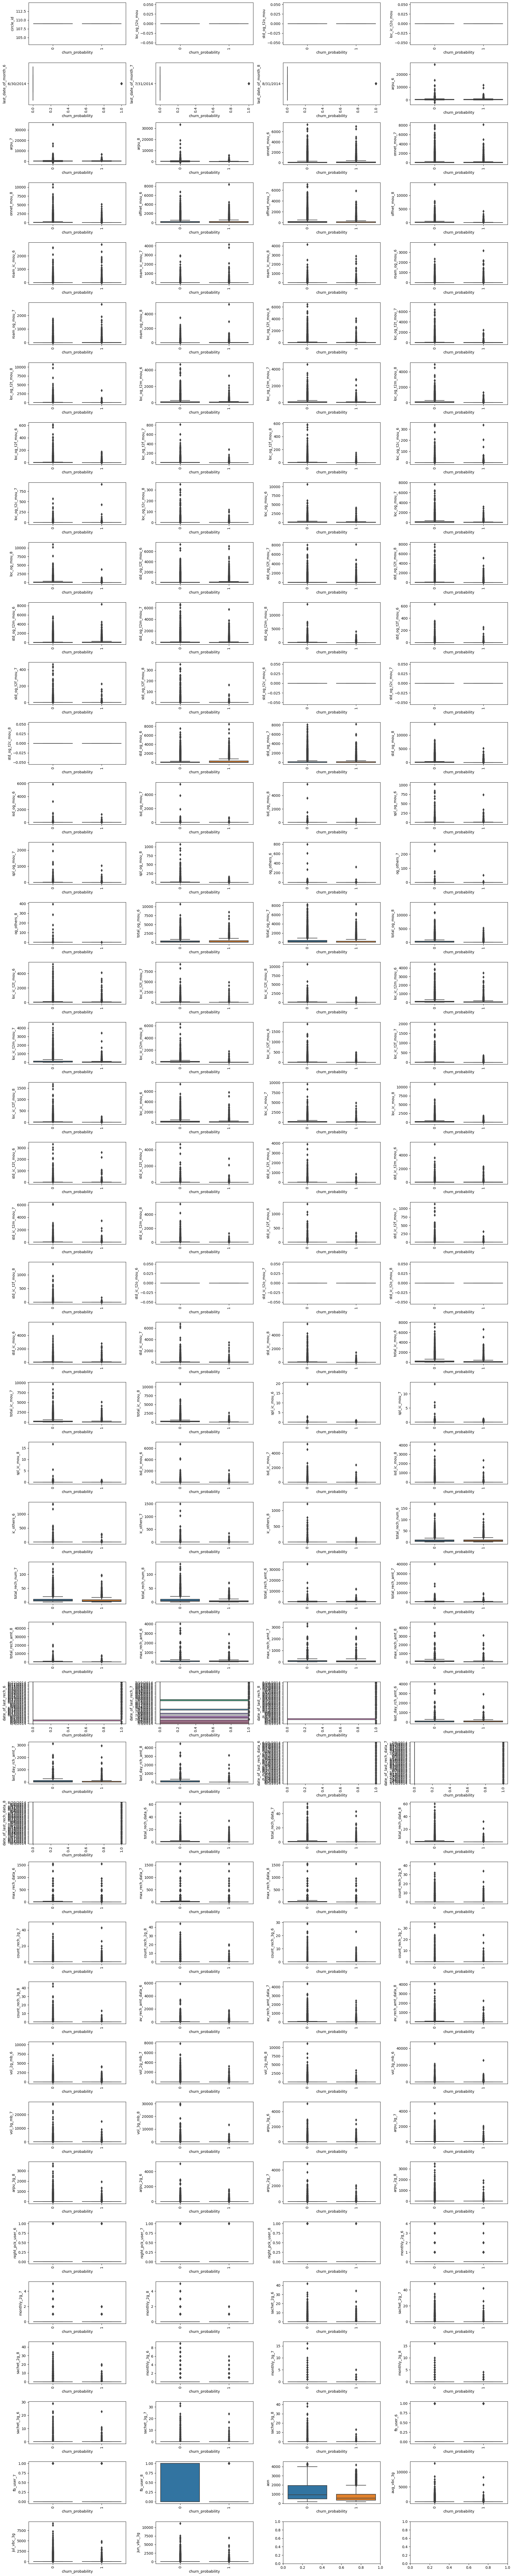

In [11]:
# Conducting bivariate analysis of churn probability with other variables using boxplots

# Setting up the grid of subplots
fig, ax = plt.subplots(43, 4, figsize=(20, 100))

# Iterating over variables and creating boxplots
for i, variable in enumerate(col_list_bar):
    plt.subplot(43, 4, i + 1)
    sns.boxplot(x='churn_probability', y=variable, data=df)
    plt.xticks(rotation=90)

# Adjusting layout for better visualization
plt.tight_layout()

# Displaying the boxplots
plt.show()


## Observation
# Circle_Id, loc_og_t2o_mou, last_date_of_month need to be deleted since all values are same
# ARPU - Revenue from non-churners is higher on average
# ONNET and OFFNET - Customers who have not churned are spending longer time on phone
# Roaming - Customers who have not churned are spending longer time on phone roaming
# Local Incoming - Customers who have not churned are spending longer time on local incoming calls
# Local Outgoing - Customers who have not churned are spending longer time on local outgoing calls
# Std Outgoing - Customers who have not churned are spending longer time on std outgoing calls
# Std Incoming - Customers who have not churned are spending longer time on std incoming calls
# Total Recharges are higher for non-churn customers
# Total Recharge amount is also higher for non-churn customer 
# Total number of Recharge for data is alos higher for non-churn customers as well as average recharge amount
# ARPU for 2g and 3g data is also higher in case of non-churn customers
# No. of 3g saches are higher for non-churn customers 

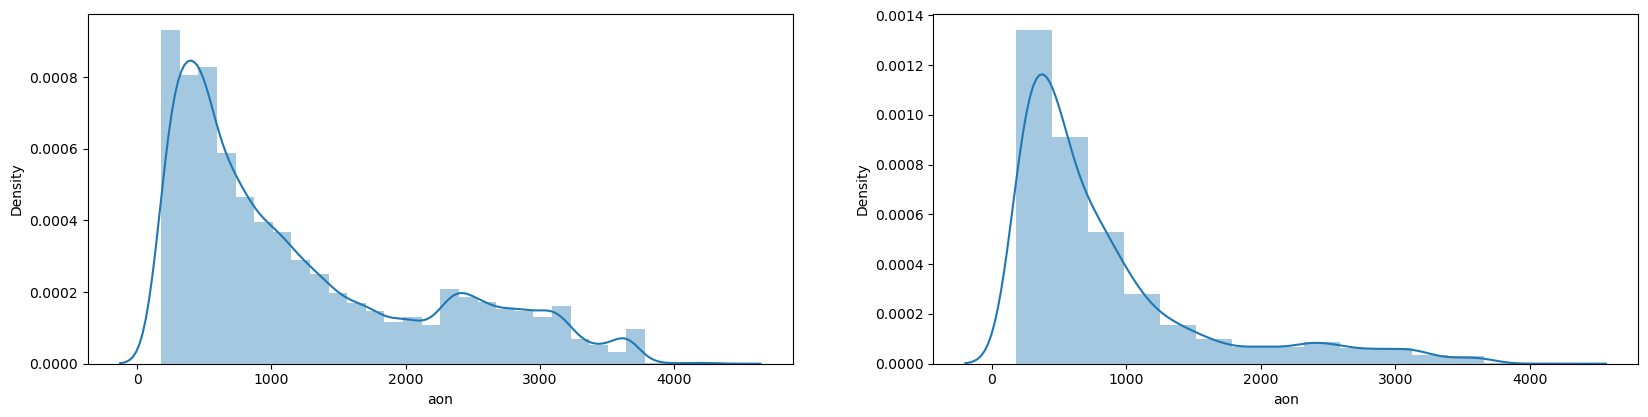

In [12]:
# AON
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.distplot(df['aon'], bins = 30)

plt.subplot(2,2,2)
sns.distplot(df_churn['aon'], bins = 15)
plt.show()

# looks like the network has not acquired any new customers or they have not shared the data of new customers
# Most customer leaving are less than 1.5 years

### Correlation Analysis

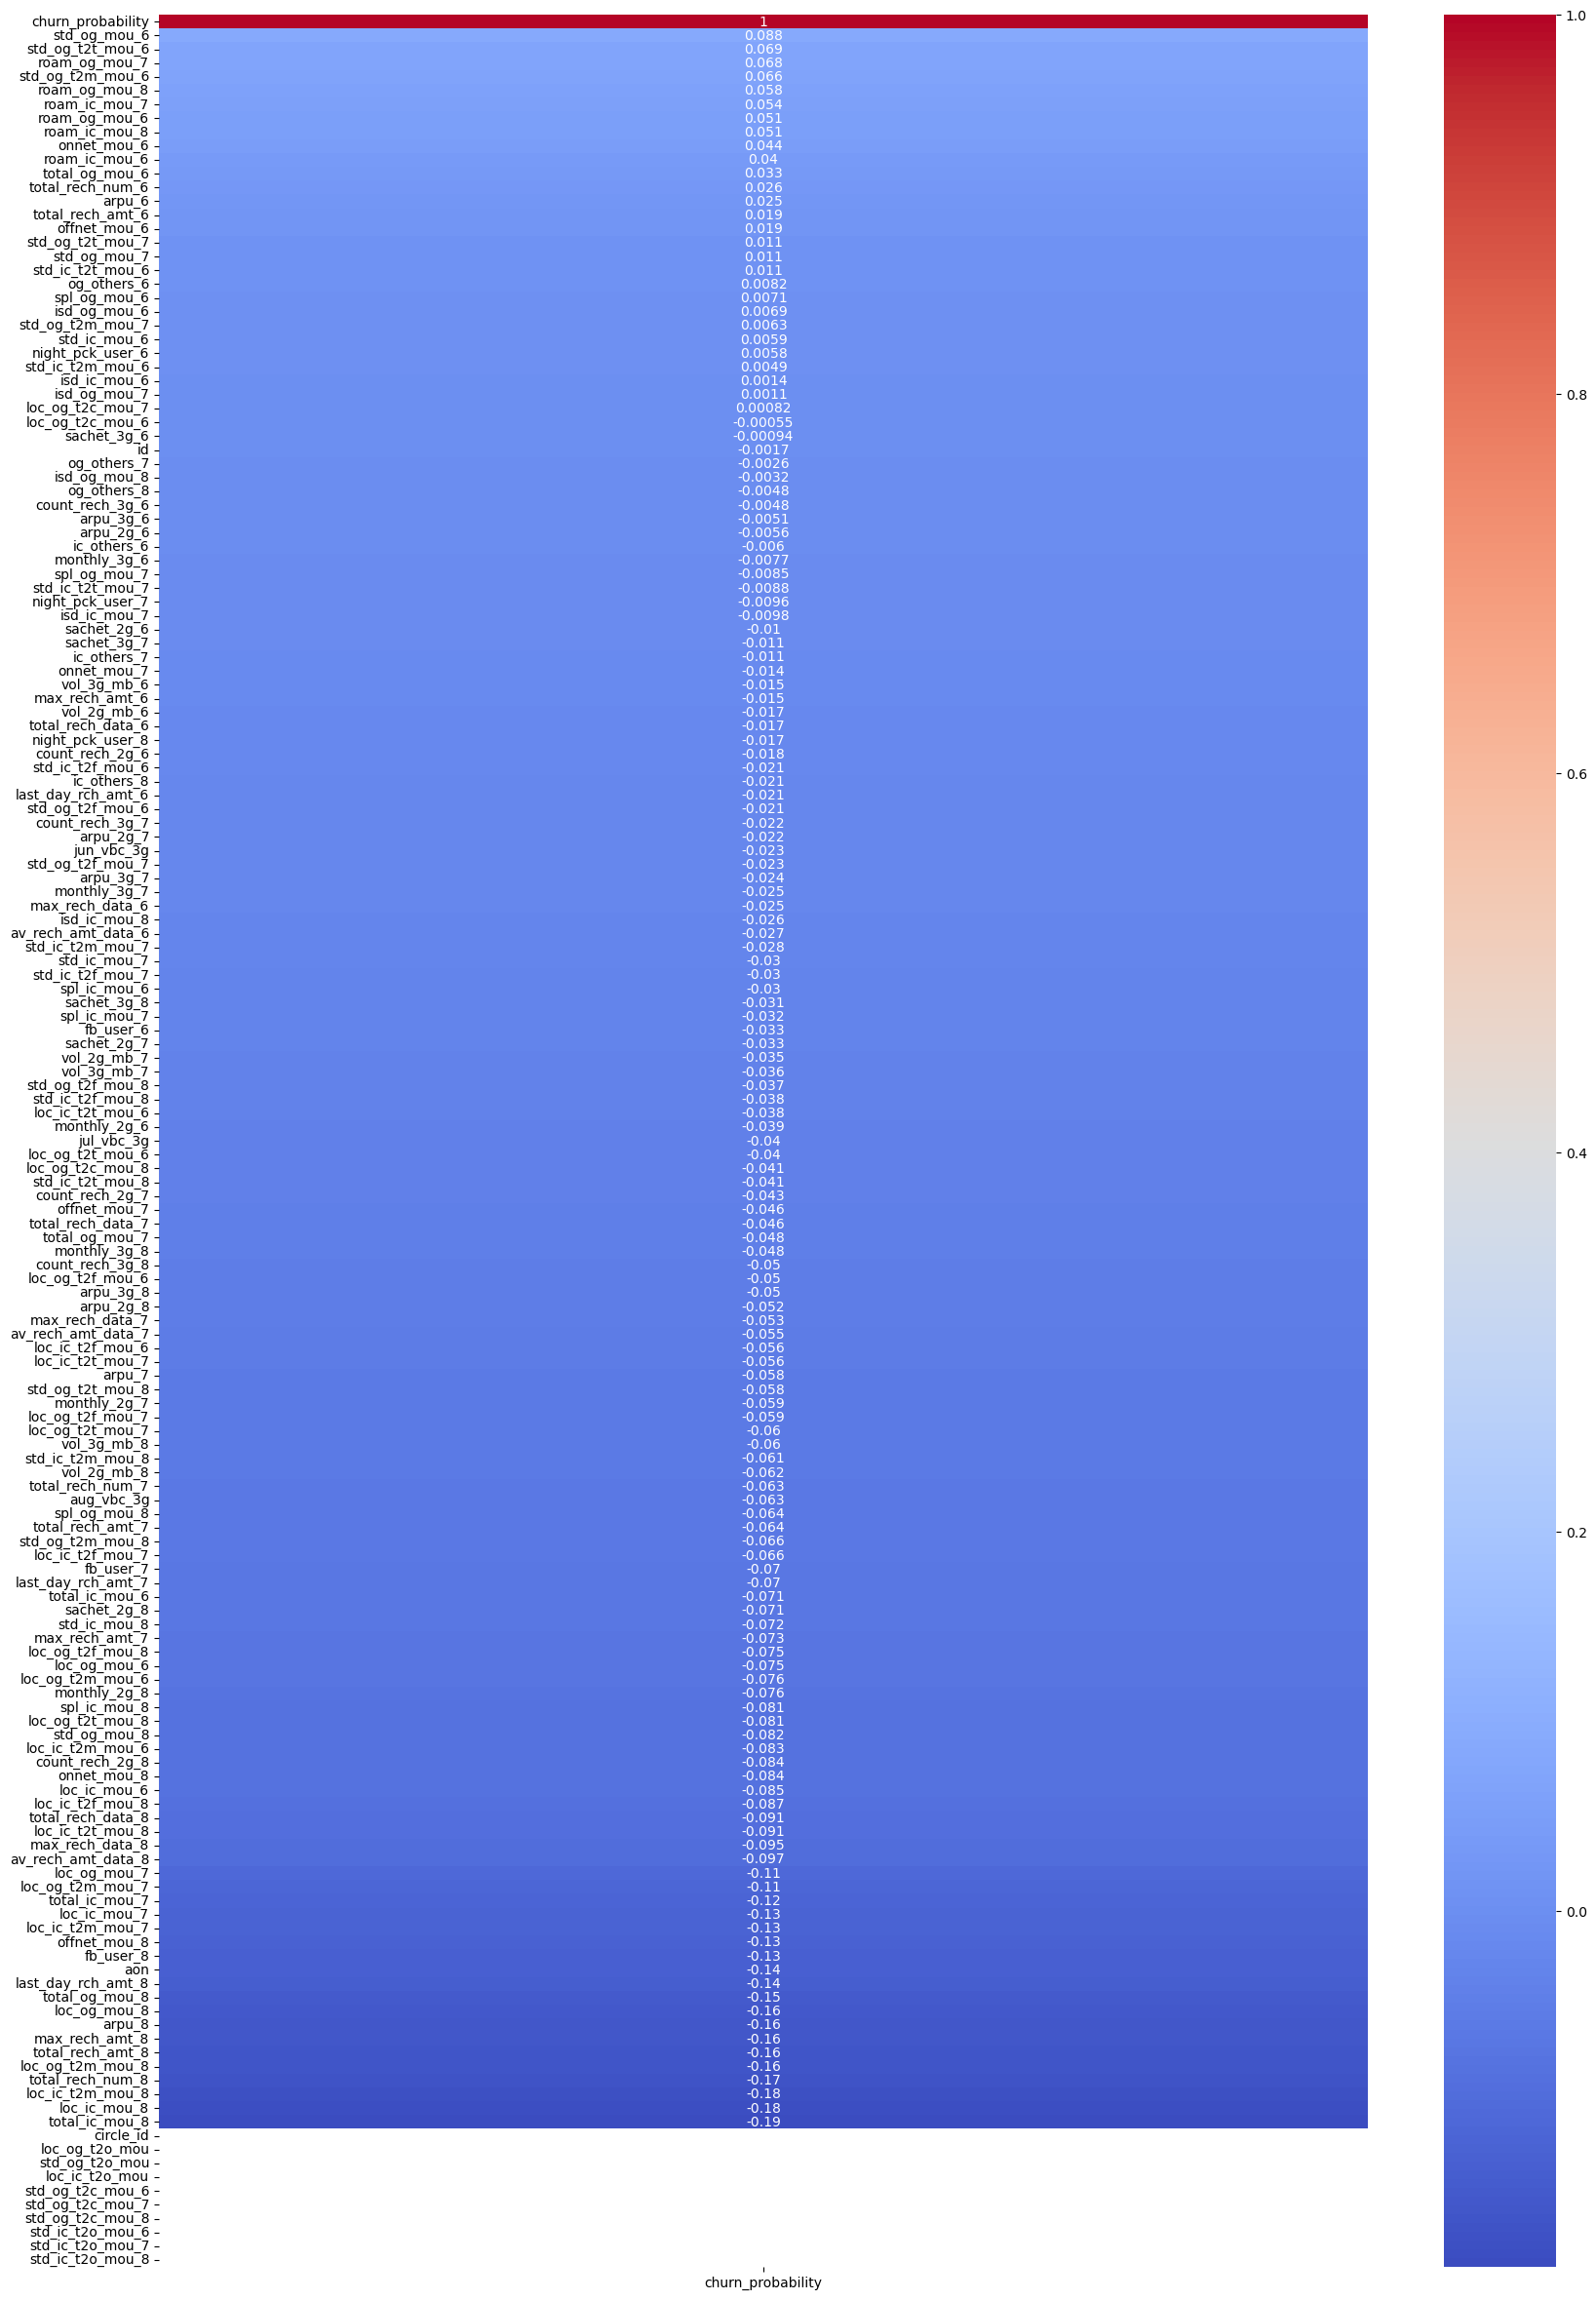

In [13]:
# Generating a heatmap with the target variable correlation

# Setting the figure size
plt.figure(figsize=(20, 30))

# Creating a heatmap of correlation with the target variable
sns.heatmap(df.corr()[['churn_probability']].sort_values(by='churn_probability', ascending=False),
            cmap='coolwarm', annot=True)

# Displaying the heatmap
plt.show()

## Limited to no correlation of variables with churn probability

## Preparing Data

In [14]:
# Determine which columns have all zeros

for ele in df.columns.tolist():
    if (df[ele] == 0).all():
        print (ele)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [15]:
# All values are zeros for the following columns
df.drop(["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], axis = 1, inplace = True)
df.drop(["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8"], axis = 1, inplace = True)
df.drop(["std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8"], axis = 1, inplace = True)

# drop last day of month. All values are same
df.drop(["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"], axis = 1, inplace = True)

# Drop data of last rech data since 75% of values missing
df.drop(["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"], axis = 1, inplace = True)

df.drop(["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], axis = 1, inplace = True)

# All users belong to same circle
# Id is not required
df.drop(["circle_id", "id"], axis = 1, inplace = True)

In [16]:
# We will create data points - June, July and August separately
# First for June
df_June = df.copy()

for ele in df_June.columns.tolist():
    if 'date' not in ele: # and 'arpu' not in ele:
        if ('_7' in ele or '_8' in ele):
            df_June.drop(ele, axis = 1, inplace = True)

         
df_June.drop(["aug_vbc_3g", "jul_vbc_3g"], axis = 1, inplace = True)

# These fields are total fields and are based on total from other fields
# Removing since these are already derived fields
df_June.drop(["loc_og_mou_6"], axis = 1, inplace = True)
df_June.drop(["std_og_mou_6"], axis = 1, inplace = True)
df_June.drop(["total_og_mou_6"], axis = 1, inplace = True)
df_June.drop(["loc_ic_mou_6"], axis = 1, inplace = True)
df_June.drop(["std_ic_mou_6"], axis = 1, inplace = True)
df_June.drop(["total_ic_mou_6"], axis = 1, inplace = True)
df_June.drop(["total_rech_data_6"], axis = 1, inplace = True)

print (df_June.shape)
print (df_June.info(verbose = 1, null_counts=True))

(69999, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              69999 non-null  float64
 1   onnet_mou_6         69999 non-null  float64
 2   offnet_mou_6        69999 non-null  float64
 3   roam_ic_mou_6       69999 non-null  float64
 4   roam_og_mou_6       69999 non-null  float64
 5   loc_og_t2t_mou_6    69999 non-null  float64
 6   loc_og_t2m_mou_6    69999 non-null  float64
 7   loc_og_t2f_mou_6    69999 non-null  float64
 8   loc_og_t2c_mou_6    69999 non-null  float64
 9   std_og_t2t_mou_6    69999 non-null  float64
 10  std_og_t2m_mou_6    69999 non-null  float64
 11  std_og_t2f_mou_6    69999 non-null  float64
 12  isd_og_mou_6        69999 non-null  float64
 13  spl_og_mou_6        69999 non-null  float64
 14  og_others_6         69999 non-null  float64
 15  loc_ic_t2t_mou_6    69999 non-null  float

In [17]:
# Remove outliers for June

df_June.drop(df_June[df_June["arpu_6"] < 0].index, inplace = True, axis = 0)
df_June.drop(df_June[df_June["arpu_6"] > 7500].index, inplace = True, axis = 0)
df_June.drop(df_June[df_June["max_rech_amt_6"] > 600].index, inplace = True, axis = 0)
df_June.drop(df_June[df_June["av_rech_amt_data_6"] > 2000].index, inplace = True, axis = 0)
df_June.drop(df_June[df_June["last_day_rch_amt_6"] > 1500].index, inplace = True, axis = 0)

# Undersampling to handle class imbalance
df_June.drop(df_June[df_June["churn_probability"] == 0].sample(frac=.4).index, inplace = True)

df_June.shape
df_June["churn_probability"].value_counts()

0    37322
1     7027
Name: churn_probability, dtype: int64

In [18]:
# Now for July
df_July = df.copy()

for ele in df_July.columns.tolist():
    if 'date' not in ele: # and 'arpu' not in ele:
        if ('_6' in ele or '_8' in ele):
            df_July.drop(ele, axis = 1, inplace = True)

         
df_July.drop(["aug_vbc_3g", "jun_vbc_3g"], axis = 1, inplace = True)

# These fields are total fields and are based on total from other fields
# Removing since these are already derived fields
df_July.drop(["loc_og_mou_7"], axis = 1, inplace = True)
df_July.drop(["std_og_mou_7"], axis = 1, inplace = True)
df_July.drop(["total_og_mou_7"], axis = 1, inplace = True)
df_July.drop(["loc_ic_mou_7"], axis = 1, inplace = True)
df_July.drop(["std_ic_mou_7"], axis = 1, inplace = True)
df_July.drop(["total_ic_mou_7"], axis = 1, inplace = True)
df_July.drop(["total_rech_data_7"], axis = 1, inplace = True)

print (df_July.shape)
print (df_July.info(verbose = 1, null_counts=True))

(69999, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_7              69999 non-null  float64
 1   onnet_mou_7         69999 non-null  float64
 2   offnet_mou_7        69999 non-null  float64
 3   roam_ic_mou_7       69999 non-null  float64
 4   roam_og_mou_7       69999 non-null  float64
 5   loc_og_t2t_mou_7    69999 non-null  float64
 6   loc_og_t2m_mou_7    69999 non-null  float64
 7   loc_og_t2f_mou_7    69999 non-null  float64
 8   loc_og_t2c_mou_7    69999 non-null  float64
 9   std_og_t2t_mou_7    69999 non-null  float64
 10  std_og_t2m_mou_7    69999 non-null  float64
 11  std_og_t2f_mou_7    69999 non-null  float64
 12  isd_og_mou_7        69999 non-null  float64
 13  spl_og_mou_7        69999 non-null  float64
 14  og_others_7         69999 non-null  float64
 15  loc_ic_t2t_mou_7    69999 non-null  float

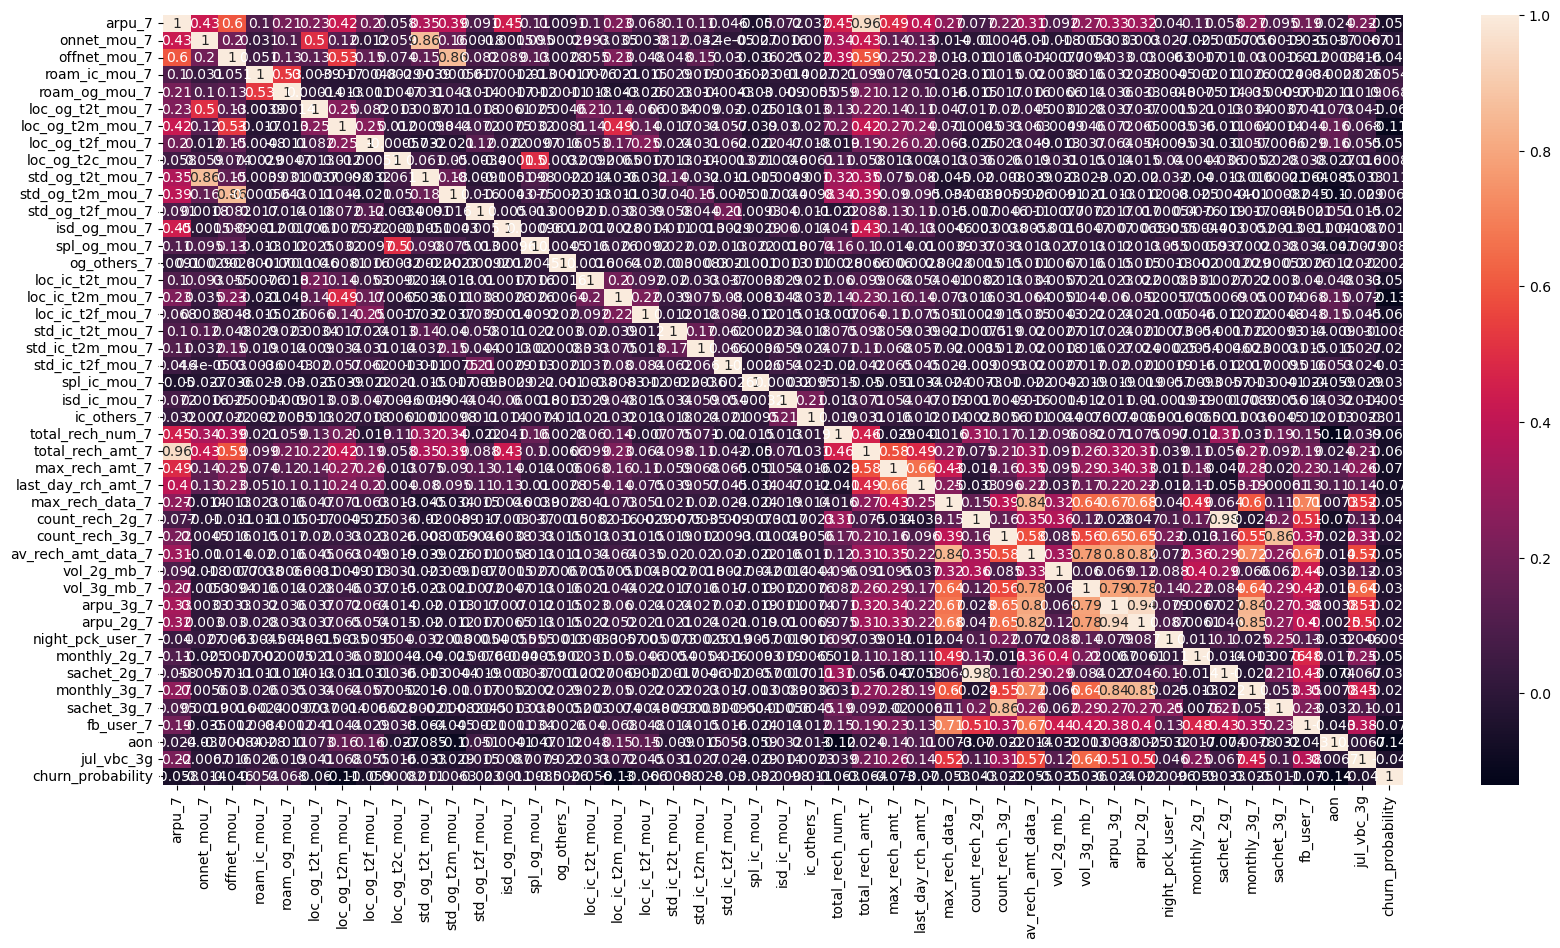

In [19]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))  # Size of the figure
sns.heatmap(df_July.corr(), annot = True)
plt.show()

# There is going to be plenty of correlation. We have already removed some of the highly correlated variables. 
# We will be using Random Forest with PCA and expect the multicolliearity to be handled.

In [20]:
# Remove outliers for July

df_July.drop(df_July[df_July["arpu_7"] < 0].index, inplace = True, axis = 0)
df_July.drop(df_July[df_July["arpu_7"] > 7500].index, inplace = True, axis = 0)
df_July.drop(df_July[df_July["max_rech_amt_7"] > 600].index, inplace = True, axis = 0)
df_July.drop(df_July[df_July["av_rech_amt_data_7"] > 2000].index, inplace = True, axis = 0)
df_July.drop(df_July[df_July["last_day_rch_amt_7"] > 1500].index, inplace = True, axis = 0)

# Undersampling to handle class imbalance
df_July.drop(df_July[df_July["churn_probability"] == 0].sample(frac=.4).index, inplace = True)

print (df_July.shape)
print (df_July["churn_probability"].value_counts())

(44244, 45)
0    37288
1     6956
Name: churn_probability, dtype: int64


In [21]:
# Now for Aug
df_Aug = df.copy()

for ele in df_Aug.columns.tolist():
    if 'date' not in ele: # and 'arpu' not in ele:
        if ('_6' in ele or '_7' in ele):
            df_Aug.drop(ele, axis = 1, inplace = True)

         
df_Aug.drop(["jun_vbc_3g", "jul_vbc_3g"], axis = 1, inplace = True)

# These fields are total fields and are based on total from other fields
# Removing since these are already derived fields
df_Aug.drop(["loc_og_mou_8"], axis = 1, inplace = True)
df_Aug.drop(["std_og_mou_8"], axis = 1, inplace = True)
df_Aug.drop(["total_og_mou_8"], axis = 1, inplace = True)
df_Aug.drop(["loc_ic_mou_8"], axis = 1, inplace = True)
df_Aug.drop(["std_ic_mou_8"], axis = 1, inplace = True)
df_Aug.drop(["total_ic_mou_8"], axis = 1, inplace = True)
df_Aug.drop(["total_rech_data_8"], axis = 1, inplace = True)

print (df_Aug.shape)
print (df_Aug.info(verbose = 1, null_counts=True))

(69999, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_8              69999 non-null  float64
 1   onnet_mou_8         69999 non-null  float64
 2   offnet_mou_8        69999 non-null  float64
 3   roam_ic_mou_8       69999 non-null  float64
 4   roam_og_mou_8       69999 non-null  float64
 5   loc_og_t2t_mou_8    69999 non-null  float64
 6   loc_og_t2m_mou_8    69999 non-null  float64
 7   loc_og_t2f_mou_8    69999 non-null  float64
 8   loc_og_t2c_mou_8    69999 non-null  float64
 9   std_og_t2t_mou_8    69999 non-null  float64
 10  std_og_t2m_mou_8    69999 non-null  float64
 11  std_og_t2f_mou_8    69999 non-null  float64
 12  isd_og_mou_8        69999 non-null  float64
 13  spl_og_mou_8        69999 non-null  float64
 14  og_others_8         69999 non-null  float64
 15  loc_ic_t2t_mou_8    69999 non-null  float

In [22]:
# Remove outliers for Aug

df_Aug.drop(df_Aug[df_Aug["arpu_8"] < 0].index, inplace = True, axis = 0)
df_Aug.drop(df_Aug[df_Aug["arpu_8"] > 7500].index, inplace = True, axis = 0)
df_Aug.drop(df_Aug[df_Aug["max_rech_amt_8"] > 600].index, inplace = True, axis = 0)
df_Aug.drop(df_Aug[df_Aug["av_rech_amt_data_8"] > 2000].index, inplace = True, axis = 0)
df_Aug.drop(df_Aug[df_Aug["last_day_rch_amt_8"] > 1500].index, inplace = True, axis = 0)

# Undersampling to handle class imbalance
df_Aug.drop(df_Aug[df_Aug["churn_probability"] == 0].sample(frac=.4).index, inplace = True)

print (df_Aug.shape)
print (df_Aug["churn_probability"].value_counts())

(44217, 45)
0    37321
1     6896
Name: churn_probability, dtype: int64


In [23]:
# Split into X and Y variables

# Putting feature variable to X
X_June = df_June.drop(['churn_probability'], axis=1)
X_July = df_July.drop(['churn_probability'], axis=1)
X_Aug = df_Aug.drop(['churn_probability'], axis=1)
    
# Putting response variable to y
y_June = df_June['churn_probability']
y_July = df_July['churn_probability']
y_Aug = df_Aug['churn_probability']

scaler_June = StandardScaler()
x_scaler_June = scaler_June.fit_transform(X_June)

scaler_July = StandardScaler()
x_scaler_July = scaler_July.fit_transform(X_July)

scaler_Aug = StandardScaler()
x_scaler_Aug = scaler_Aug.fit_transform(X_Aug)


### Read and clean the test.csv

In [24]:
df_test = pd.read_csv("test.csv")
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [25]:
## Assume 0 for missing entries if not dates
for ele in cols:
    if 'date' not in ele:
        df_test[ele] = df_test[ele].fillna(0)

In [26]:
# drop as per the train data
df_test.drop(["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], axis = 1, inplace = True)
df_test.drop(["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8"], axis = 1, inplace = True)
df_test.drop(["std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8"], axis = 1, inplace = True)

# drop last day of month. All values are same
df_test.drop(["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"], axis = 1, inplace = True)

# Drop data of last rech data since 75% of values missing
df_test.drop(["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"], axis = 1, inplace = True)

df_test.drop(["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], axis = 1, inplace = True)

# All users belong to same circle
# Id is not required
df_test.drop(["circle_id", "id"], axis = 1, inplace = True)

In [27]:
# We will create data points - June, July and August separately according to train data
# First for June
df_June_test = df_test.copy()

for ele in df_June_test.columns.tolist():
    if 'date' not in ele: # and 'arpu' not in ele:
        if ('_7' in ele or '_8' in ele):
            df_June_test.drop(ele, axis = 1, inplace = True)

         
df_June_test.drop(["aug_vbc_3g", "jul_vbc_3g"], axis = 1, inplace = True)

# These fields are total fields and are based on total from other fields
# Removing since these are already derived fields
df_June_test.drop(["loc_og_mou_6"], axis = 1, inplace = True)
df_June_test.drop(["std_og_mou_6"], axis = 1, inplace = True)
df_June_test.drop(["total_og_mou_6"], axis = 1, inplace = True)
df_June_test.drop(["loc_ic_mou_6"], axis = 1, inplace = True)
df_June_test.drop(["std_ic_mou_6"], axis = 1, inplace = True)
df_June_test.drop(["total_ic_mou_6"], axis = 1, inplace = True)
df_June_test.drop(["total_rech_data_6"], axis = 1, inplace = True)

print (df_June_test.shape)
print (df_June_test.info(verbose = 1, null_counts=True))

(30000, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              30000 non-null  float64
 1   onnet_mou_6         30000 non-null  float64
 2   offnet_mou_6        30000 non-null  float64
 3   roam_ic_mou_6       30000 non-null  float64
 4   roam_og_mou_6       30000 non-null  float64
 5   loc_og_t2t_mou_6    30000 non-null  float64
 6   loc_og_t2m_mou_6    30000 non-null  float64
 7   loc_og_t2f_mou_6    30000 non-null  float64
 8   loc_og_t2c_mou_6    30000 non-null  float64
 9   std_og_t2t_mou_6    30000 non-null  float64
 10  std_og_t2m_mou_6    30000 non-null  float64
 11  std_og_t2f_mou_6    30000 non-null  float64
 12  isd_og_mou_6        30000 non-null  float64
 13  spl_og_mou_6        30000 non-null  float64
 14  og_others_6         30000 non-null  float64
 15  loc_ic_t2t_mou_6    30000 non-null  float

In [28]:
# Now for July
df_July_test = df_test.copy()

for ele in df_July_test.columns.tolist():
    if 'date' not in ele: # and 'arpu' not in ele:
        if ('_6' in ele or '_8' in ele):
            df_July_test.drop(ele, axis = 1, inplace = True)

         
df_July_test.drop(["aug_vbc_3g", "jun_vbc_3g"], axis = 1, inplace = True)

# These fields are total fields and are based on total from other fields
# Removing since these are already derived fields
df_July_test.drop(["loc_og_mou_7"], axis = 1, inplace = True)
df_July_test.drop(["std_og_mou_7"], axis = 1, inplace = True)
df_July_test.drop(["total_og_mou_7"], axis = 1, inplace = True)
df_July_test.drop(["loc_ic_mou_7"], axis = 1, inplace = True)
df_July_test.drop(["std_ic_mou_7"], axis = 1, inplace = True)
df_July_test.drop(["total_ic_mou_7"], axis = 1, inplace = True)
df_July_test.drop(["total_rech_data_7"], axis = 1, inplace = True)

print (df_July_test.shape)
print (df_July_test.info(verbose = 1, null_counts=True))

(30000, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_7              30000 non-null  float64
 1   onnet_mou_7         30000 non-null  float64
 2   offnet_mou_7        30000 non-null  float64
 3   roam_ic_mou_7       30000 non-null  float64
 4   roam_og_mou_7       30000 non-null  float64
 5   loc_og_t2t_mou_7    30000 non-null  float64
 6   loc_og_t2m_mou_7    30000 non-null  float64
 7   loc_og_t2f_mou_7    30000 non-null  float64
 8   loc_og_t2c_mou_7    30000 non-null  float64
 9   std_og_t2t_mou_7    30000 non-null  float64
 10  std_og_t2m_mou_7    30000 non-null  float64
 11  std_og_t2f_mou_7    30000 non-null  float64
 12  isd_og_mou_7        30000 non-null  float64
 13  spl_og_mou_7        30000 non-null  float64
 14  og_others_7         30000 non-null  float64
 15  loc_ic_t2t_mou_7    30000 non-null  float

In [29]:
# Now for Aug
df_Aug_test = df_test.copy()

for ele in df_Aug_test.columns.tolist():
    if 'date' not in ele: # and 'arpu' not in ele:
        if ('_6' in ele or '_7' in ele):
            df_Aug_test.drop(ele, axis = 1, inplace = True)

         
df_Aug_test.drop(["jun_vbc_3g", "jul_vbc_3g"], axis = 1, inplace = True)

# These fields are total fields and are based on total from other fields
# Removing since these are already derived fields
df_Aug_test.drop(["loc_og_mou_8"], axis = 1, inplace = True)
df_Aug_test.drop(["std_og_mou_8"], axis = 1, inplace = True)
df_Aug_test.drop(["total_og_mou_8"], axis = 1, inplace = True)
df_Aug_test.drop(["loc_ic_mou_8"], axis = 1, inplace = True)
df_Aug_test.drop(["std_ic_mou_8"], axis = 1, inplace = True)
df_Aug_test.drop(["total_ic_mou_8"], axis = 1, inplace = True)
df_Aug_test.drop(["total_rech_data_8"], axis = 1, inplace = True)

print (df_Aug_test.shape)
print (df_Aug_test.info(verbose = 1, null_counts=True))

(30000, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_8              30000 non-null  float64
 1   onnet_mou_8         30000 non-null  float64
 2   offnet_mou_8        30000 non-null  float64
 3   roam_ic_mou_8       30000 non-null  float64
 4   roam_og_mou_8       30000 non-null  float64
 5   loc_og_t2t_mou_8    30000 non-null  float64
 6   loc_og_t2m_mou_8    30000 non-null  float64
 7   loc_og_t2f_mou_8    30000 non-null  float64
 8   loc_og_t2c_mou_8    30000 non-null  float64
 9   std_og_t2t_mou_8    30000 non-null  float64
 10  std_og_t2m_mou_8    30000 non-null  float64
 11  std_og_t2f_mou_8    30000 non-null  float64
 12  isd_og_mou_8        30000 non-null  float64
 13  spl_og_mou_8        30000 non-null  float64
 14  og_others_8         30000 non-null  float64
 15  loc_ic_t2t_mou_8    30000 non-null  float

In [30]:
# Transform the data

X_scaler_June_test = scaler_June.transform(df_June_test)
X_scaler_July_test = scaler_July.transform(df_July_test)
X_scaler_Aug_test = scaler_Aug.transform(df_Aug_test)

## Model Building using PCA Components

In [31]:
pca_final_June = IncrementalPCA(n_components=30)
X_train_pca_June = pca_final_June.fit_transform(x_scaler_June)
X_test_pca_June = pca_final_June.transform(X_scaler_June_test)
# The correlations have been checked. They are uncorrelated

In [32]:
pca_final_July = IncrementalPCA(n_components=30)
X_train_pca_July = pca_final_July.fit_transform(x_scaler_July)
X_test_pca_July = pca_final_July.transform(X_scaler_July_test)
# The correlations have been checked. They are uncorrelated

In [33]:
pca_final_Aug = IncrementalPCA(n_components=30)
X_train_pca_Aug = pca_final_Aug.fit_transform(x_scaler_Aug)
X_test_pca_Aug = pca_final_Aug.transform(X_scaler_Aug_test)

# The correlations have been checked. They are uncorrelated

### Random Forest Classifier

In [34]:
# Create columns with different probability cutoffs 
def calcProbCutoff(pred_probs_train_rf, y):
    y_train_pred_rf = pd.DataFrame()
    y_train_pred_rf["Churn"] = y
    y_train_pred_rf["Churn_Prob"] = pred_probs_train_rf[:,1]

    numbers = [float(x)/20 for x in range(20)]
    for i in numbers:
        y_train_pred_rf[i]= y_train_pred_rf.Churn_Prob.map(lambda x: 1 if x > i else 0)
    return y_train_pred_rf

In [35]:
def calcMetrics(y_train_pred_rf, y):

    cutoff_df_rf = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'TP', 'TN', 'FP', 'FN', 'precision', 'recall'])
    cutoff_df_rf.reset_index()

    num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
    for i in num:
        cm1 = metrics.confusion_matrix(y, y_train_pred_rf[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

        TP = cm1[1,1] # true positive 
        TN = cm1[0,0] # true negatives
        FP = cm1[0,1] # false positives
        FN = cm1[1,0] # false negatives

        precision = cm1[1,1]/(cm1[1,1] + cm1[0,1]) # TP/(TP + FP)
        recall =  cm1[1,1]/(cm1[1,1] + cm1[1,0])   # TP / (TP + FN)

        cutoff_df_rf.loc[i] = [i,accuracy,sensi,speci, TP, TN, FP, FN, precision, recall]
    
    return cutoff_df_rf

### June

In [36]:
# Run the random forest classifier. Please note that the parameters have been tested and best parameters are used
rf_June = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=5, random_state=42, min_samples_leaf = 20, oob_score=True)
model_rf_June =  rf_June.fit(X_train_pca_June, y_June)
pred_probs_train_rf_June = model_rf_June.predict_proba(X_train_pca_June)
rf_June.oob_score_

0.8424541703307854

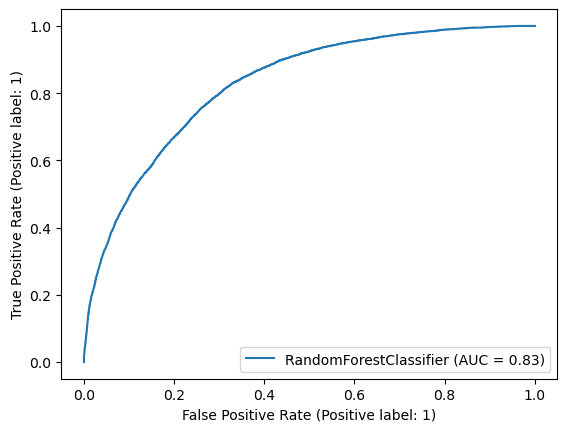

In [37]:
rfc_disp = RocCurveDisplay.from_estimator(rf_June, X_train_pca_June, y_June)
plt.show()


In [38]:
# Calculate metrics with different probability cutoffs
y_train_pred_rf_June = calcProbCutoff(pred_probs_train_rf_June, y_June)
cutoff_df_rf_June = calcMetrics(y_train_pred_rf_June, y_June)
print(round(cutoff_df_rf_June, 2))

      prob  accuracy  sensi  speci      TP       TN       FP      FN  \
0.00  0.00      0.16   1.00   0.00  7027.0      0.0  37322.0     0.0   
0.05  0.05      0.28   0.99   0.14  6988.0   5374.0  31948.0    39.0   
0.10  0.10      0.51   0.95   0.42  6667.0  15812.0  21510.0   360.0   
0.15  0.15      0.65   0.87   0.61  6113.0  22761.0  14561.0   914.0   
0.20  0.20      0.74   0.75   0.74  5274.0  27734.0   9588.0  1753.0   
0.25  0.25      0.81   0.58   0.86  4044.0  31935.0   5387.0  2983.0   
0.30  0.30      0.86   0.32   0.96  2279.0  35707.0   1615.0  4748.0   
0.35  0.35      0.86   0.14   0.99   976.0  36970.0    352.0  6051.0   
0.40  0.40      0.85   0.06   1.00   409.0  37195.0    127.0  6618.0   
0.45  0.45      0.84   0.03   1.00   176.0  37296.0     26.0  6851.0   
0.50  0.50      0.84   0.01   1.00    72.0  37320.0      2.0  6955.0   
0.55  0.55      0.84   0.00   1.00    34.0  37322.0      0.0  6993.0   
0.60  0.60      0.84   0.00   1.00    18.0  37322.0      0.0  70

0.5


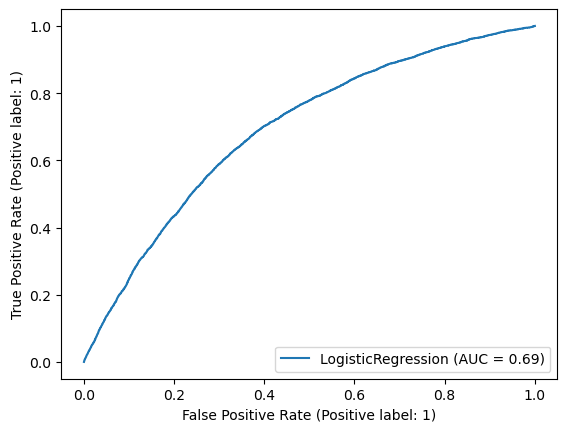

In [39]:
## Try Logistic Regression

lr_June = LogisticRegression()
model_lr_June = lr_June.fit(X_train_pca_June, y_June)
pred_probs_train_lr_June = model_lr_June.predict(X_train_pca_June)
print ("{:2.2}".format(metrics.roc_auc_score(y_June, pred_probs_train_lr_June)))

rfc_disp = RocCurveDisplay.from_estimator(model_lr_June, X_train_pca_June, y_June)
plt.show()

# Accuracy and ROC curve are poor

### July

In [40]:
# Run the random forest classifier. Please note that the parameters have been tested and best parameters are used
rf_July = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=5, random_state=42, min_samples_leaf = 20, oob_score=True)
model_rf_July =  rf_July.fit(X_train_pca_July, y_July)
pred_probs_train_rf_July = model_rf_July.predict_proba(X_train_pca_July)
rf_July.oob_score_

0.8568619473826959

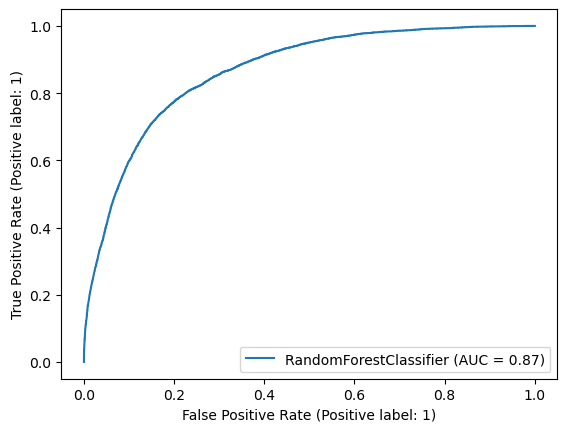

In [41]:
rfc_disp = RocCurveDisplay.from_estimator(rf_July, X_train_pca_July, y_July)
plt.show()

In [42]:
# Calculate metrics with different probability cutoffs
y_train_pred_rf_July = calcProbCutoff(pred_probs_train_rf_July, y_July)
cutoff_df_rf_July = calcMetrics(y_train_pred_rf_July, y_July)
print(round(cutoff_df_rf_July, 2))

      prob  accuracy  sensi  speci      TP       TN       FP      FN  \
0.00  0.00      0.16   1.00   0.00  6956.0      0.0  37288.0     0.0   
0.05  0.05      0.36   0.99   0.24  6894.0   8937.0  28351.0    62.0   
0.10  0.10      0.61   0.93   0.55  6495.0  20543.0  16745.0   461.0   
0.15  0.15      0.74   0.84   0.73  5820.0  27072.0  10216.0  1136.0   
0.20  0.20      0.83   0.71   0.85  4938.0  31699.0   5589.0  2018.0   
0.25  0.25      0.86   0.57   0.91  3947.0  33925.0   3363.0  3009.0   
0.30  0.30      0.86   0.47   0.94  3261.0  34986.0   2302.0  3695.0   
0.35  0.35      0.87   0.40   0.95  2773.0  35503.0   1785.0  4183.0   
0.40  0.40      0.87   0.35   0.96  2406.0  35870.0   1418.0  4550.0   
0.45  0.45      0.87   0.30   0.97  2098.0  36199.0   1089.0  4858.0   
0.50  0.50      0.87   0.25   0.98  1748.0  36528.0    760.0  5208.0   
0.55  0.55      0.86   0.16   0.99  1139.0  36983.0    305.0  5817.0   
0.60  0.60      0.85   0.09   1.00   631.0  37194.0     94.0  63

0.5


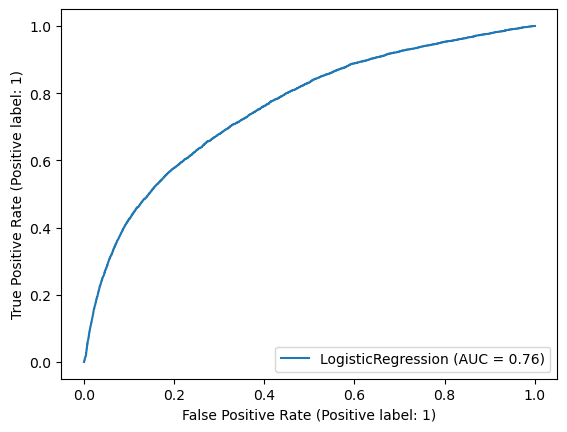

In [43]:
## Try Logistic Regression

lr_July = LogisticRegression()
model_lr_July = lr_July.fit(X_train_pca_July, y_July)
pred_probs_train_lr_July = model_lr_July.predict(X_train_pca_July)
print ("{:2.2}".format(metrics.roc_auc_score(y_July, pred_probs_train_lr_July)))

rfc_disp_July = RocCurveDisplay.from_estimator(model_lr_July, X_train_pca_July, y_July)
plt.show()

# Accuracy and ROC curve are poor

### August

In [44]:
# Run the random forest classifier. Please note that the parameters have been tested and best parameters are used
rf_Aug = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=5, random_state=42, min_samples_leaf = 20, oob_score=True)
model_rf_Aug =  rf_Aug.fit(X_train_pca_Aug, y_Aug)
pred_probs_train_rf_Aug = model_rf_Aug.predict_proba(X_train_pca_Aug)
rf_Aug.oob_score_

0.9103286066445032

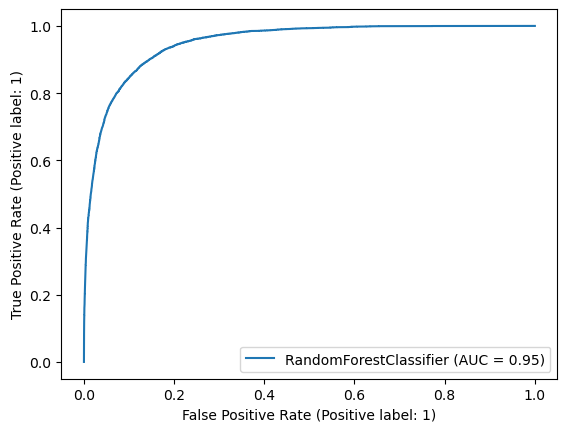

In [45]:
rfc_disp = RocCurveDisplay.from_estimator(rf_Aug, X_train_pca_Aug, y_Aug)
plt.show()

In [46]:
# Calculate metrics with different probability cutoffs
y_train_pred_rf_Aug = calcProbCutoff(pred_probs_train_rf_Aug, y_Aug)
cutoff_df_rf_Aug = calcMetrics(y_train_pred_rf_Aug, y_Aug)
print(round(cutoff_df_rf_Aug, 2))

      prob  accuracy  sensi  speci      TP       TN       FP      FN  \
0.00  0.00      0.16   1.00   0.00  6896.0      0.0  37321.0     0.0   
0.05  0.05      0.63   0.99   0.57  6823.0  21116.0  16205.0    73.0   
0.10  0.10      0.83   0.94   0.81  6453.0  30213.0   7108.0   443.0   
0.15  0.15      0.88   0.86   0.89  5962.0  33088.0   4233.0   934.0   
0.20  0.20      0.90   0.81   0.92  5600.0  34375.0   2946.0  1296.0   
0.25  0.25      0.91   0.77   0.94  5297.0  35119.0   2202.0  1599.0   
0.30  0.30      0.92   0.73   0.95  5016.0  35579.0   1742.0  1880.0   
0.35  0.35      0.92   0.69   0.96  4760.0  35873.0   1448.0  2136.0   
0.40  0.40      0.92   0.65   0.97  4484.0  36107.0   1214.0  2412.0   
0.45  0.45      0.92   0.62   0.97  4294.0  36288.0   1033.0  2602.0   
0.50  0.50      0.92   0.59   0.98  4068.0  36421.0    900.0  2828.0   
0.55  0.55      0.91   0.56   0.98  3894.0  36510.0    811.0  3002.0   
0.60  0.60      0.91   0.54   0.98  3716.0  36620.0    701.0  31

0.75


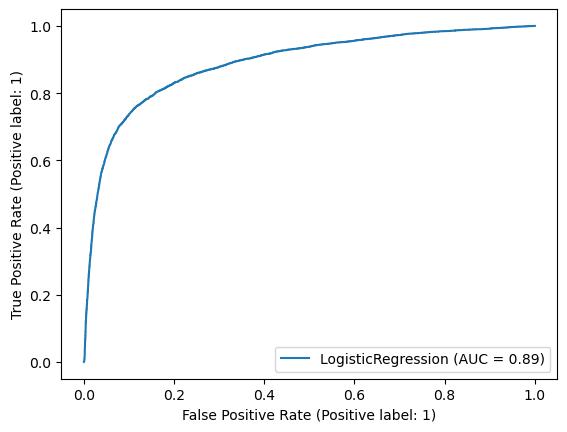

In [47]:
## Try Logistic Regression

lr_Aug = LogisticRegression()
model_lr_Aug = lr_Aug.fit(X_train_pca_Aug, y_Aug)
pred_probs_train_lr_Aug = model_lr_Aug.predict(X_train_pca_Aug)
print ("{:2.2}".format(metrics.roc_auc_score(y_Aug, pred_probs_train_lr_Aug)))

rfc_disp_Aug = RocCurveDisplay.from_estimator(model_lr_Aug, X_train_pca_Aug, y_Aug)
plt.show()

## Much better compared to June and July. However, Random Forest Classifier for Aug has better accuracy

## Predicting Accuracy on Test Data

In [48]:
df_test_reread = pd.read_csv("test.csv")
df_test_reread.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [49]:
submission_data = pd.DataFrame()
submission_data["id"] = df_test_reread["id"]
submission_data.head()

id
0  69999
1  70000
2  70001
3  70002
4  70003

In [50]:
pred_probs_test_rf_June = model_rf_June.predict_proba(X_test_pca_June)
submission_data["june_prob"] = pred_probs_test_rf_June[:,1]
submission_data["june_churn_probability"]= submission_data.june_prob.map(lambda x: 1 if x > 0.25 else 0)

In [51]:
pred_probs_test_rf_July = model_rf_July.predict_proba(X_test_pca_July)
submission_data["july_prob"] = pred_probs_test_rf_July[:,1]
submission_data["july_churn_probability"]= submission_data.july_prob.map(lambda x: 1 if x > 0.25 else 0)

In [52]:
pred_probs_test_rf_Aug = model_rf_Aug.predict_proba(X_test_pca_Aug)
submission_data["aug_prob"] = pred_probs_test_rf_Aug[:,1]
submission_data["aug_churn_probability"]= submission_data.aug_prob.map(lambda x: 1 if x > 0.25 else 0)

In [53]:
submission_data["churn_probability"] =  submission_data["july_churn_probability"] & submission_data["aug_churn_probability"]
submission_data["churn_probability"].value_counts()

0    27880
1     2120
Name: churn_probability, dtype: int64

In [54]:
submission_data.drop(["june_prob", "july_prob", "aug_prob"], inplace = True, axis = 1)
submission_data.drop(["june_churn_probability", "july_churn_probability", "aug_churn_probability"], inplace = True, axis = 1)
submission_data.set_index('id')

churn_probability
id                      
69999                  0
70000                  0
70001                  1
70002                  0
70003                  0
70004                  1
70005                  0
70006                  0
70007                  0
70008                  0
70009                  0
70010                  0
70011                  0
70012                  0
70013                  0
70014                  0
70015                  0
70016                  0
70017                  0
70018                  0
70019                  1
70020                  0
70021                  0
70022                  0
70023                  0
70024                  0
70025                  0
70026                  0
70027                  0
70028                  0
70029                  0
70030                  0
70031                  0
70032                  1
70033                  0
70034                  0
70035                  0
70036                  0
70037                  0
70038                  0
70039                  0
70040                  0
70041                  1
70042                  0
70043                  0
70044                  0
70045                  0
70046                  0
70047                  0
70048                  0
70049                  0
70050                  0
70051                  0
70052                  0
70053                  0
70054                  0
70055                  0
70056                  0
70057                  0
70058                  0
70059                  0
70060                  0
70061                  0
70062                  0
70063                  0
70064                  0
70065                  0
70066                  0
70067                  0
70068                  0
70069                  0
70070                  0
70071                  0
70072                  0
70073                  0
70074                  0
70075                  0
70076                  0
70077                  0
70078                  1
70079                  0
70080                  0
70081                  1
70082                  0
70083                  0
70084                  0
70085                  1
70086                  0
70087                  0
70088                  0
70089                  0
70090                  0
70091                  0
70092                  0
70093                  0
70094                  0
70095                  0
70096                  0
70097                  0
70098                  0
70099                  0
70100                  0
70101                  0
70102                  0
70103                  1
70104                  0
70105                  0
70106                  0
70107                  0
70108                  0
70109                  0
70110                  0
70111                  1
70112                  0
70113                  0
70114                  0
70115                  0
70116                  0
70117                  0
70118                  0
70119                  0
70120                  0
70121                  0
70122                  0
70123                  0
70124                  0
70125                  0
70126                  0
70127                  0
70128                  0
70129                  0
70130                  0
70131                  0
70132                  0
70133                  0
70134                  0
70135                  0
70136                  0
70137                  0
70138                  0
70139                  0
70140                  1
70141                  0
70142                  0
70143                  0
70144                  0
70145                  0
70146                  0
70147                  1
70148                  0
70149                  0
70150                  0
70151                  0
70152                  0
70153                  0
70154                  0
70155                  0
70156                  0
70157  

In [55]:
submission_data.to_csv('submission.csv',index=False)

## Model Building

### Model Building using Random Forest Classifier without PCA

In [56]:
## Please note we tried using various params and found the best estimate. 
## We are limiting to just one set for faster computation. Our laptops took more than an hour to compute.

#rf_wo_pca = RandomForestClassifier(random_state=42, n_jobs = -1)
#params = {
#    'max_depth': [5,10,15,20],
#    'min_samples_leaf': [10,20,50,100],
#    'n_estimators': [20,50,100,200],
#    'max_features': [5,10,15]
#}

#grid_search_June = GridSearchCV(estimator=rf_wo_pca,
#                           param_grid=params,
#                           cv = 4,
#                           n_jobs=-1, verbose=1, scoring="accuracy")

#grid_search.fit(X, y)

In [57]:
rf_June_wo_pca = RandomForestClassifier(random_state=42,
                                        bootstrap=True,
                                        max_depth=10,
                                        min_samples_leaf=20, 
                                        max_features=5,
                                        n_estimators=50)

In [58]:
rf_June_wo_pca.fit(X_June, y_June)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=20,
                       n_estimators=50, random_state=42)

In [59]:
imp_df = pd.DataFrame({
    "Varname": X_June.columns,
    "Imp": rf_June_wo_pca.feature_importances_
})
print (round(imp_df.sort_values(by="Imp", ascending=False), 2))

               Varname   Imp
16    loc_ic_t2m_mou_6  0.12
42                 aon  0.09
15    loc_ic_t2t_mou_6  0.07
17    loc_ic_t2f_mou_6  0.06
6     loc_og_t2m_mou_6  0.06
9     std_og_t2t_mou_6  0.06
0               arpu_6  0.05
10    std_og_t2m_mou_6  0.05
5     loc_og_t2t_mou_6  0.04
2         offnet_mou_6  0.04
1          onnet_mou_6  0.04
4        roam_og_mou_6  0.03
25    total_rech_amt_6  0.03
24    total_rech_num_6  0.03
7     loc_og_t2f_mou_6  0.03
3        roam_ic_mou_6  0.02
27  last_day_rch_amt_6  0.02
26      max_rech_amt_6  0.02
19    std_ic_t2m_mou_6  0.02
18    std_ic_t2t_mou_6  0.02
13        spl_og_mou_6  0.01
31  av_rech_amt_data_6  0.01
14         og_others_6  0.01
20    std_ic_t2f_mou_6  0.01
28     max_rech_data_6  0.01
22        isd_ic_mou_6  0.01
32         vol_2g_mb_6  0.01
33         vol_3g_mb_6  0.01
35           arpu_2g_6  0.01
41           fb_user_6  0.01
23         ic_others_6  0.00
43          jun_vbc_3g  0.00
8     loc_og_t2c_mou_6  0.00
12        isd_

In [60]:
rf_July_wo_pca = RandomForestClassifier(random_state=42,
                                        bootstrap=True,
                                        max_depth=10,
                                        min_samples_leaf=20, 
                                        max_features=5,
                                        n_estimators=50)

In [61]:
rf_July_wo_pca.fit(X_July, y_July)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=20,
                       n_estimators=50, random_state=42)

In [62]:
imp_df = pd.DataFrame({
    "Varname": X_July.columns,
    "Imp": rf_July_wo_pca.feature_importances_
})
print (round(imp_df.sort_values(by="Imp", ascending=False), 2))

               Varname   Imp
16    loc_ic_t2m_mou_7  0.19
6     loc_og_t2m_mou_7  0.10
15    loc_ic_t2t_mou_7  0.09
5     loc_og_t2t_mou_7  0.07
4        roam_og_mou_7  0.06
17    loc_ic_t2f_mou_7  0.04
26      max_rech_amt_7  0.04
42                 aon  0.04
0               arpu_7  0.04
24    total_rech_num_7  0.04
3        roam_ic_mou_7  0.03
2         offnet_mou_7  0.03
25    total_rech_amt_7  0.03
1          onnet_mou_7  0.03
7     loc_og_t2f_mou_7  0.02
27  last_day_rch_amt_7  0.02
10    std_og_t2m_mou_7  0.02
19    std_ic_t2m_mou_7  0.02
9     std_og_t2t_mou_7  0.02
31  av_rech_amt_data_7  0.01
13        spl_og_mou_7  0.01
32         vol_2g_mb_7  0.01
18    std_ic_t2t_mou_7  0.01
20    std_ic_t2f_mou_7  0.01
28     max_rech_data_7  0.01
33         vol_3g_mb_7  0.00
41           fb_user_7  0.00
8     loc_og_t2c_mou_7  0.00
43          jul_vbc_3g  0.00
35           arpu_2g_7  0.00
29     count_rech_2g_7  0.00
21        spl_ic_mou_7  0.00
22        isd_ic_mou_7  0.00
23         ic_

In [63]:
rf_Aug_wo_pca = RandomForestClassifier(random_state=42,
                                       bootstrap=True,
                                       max_depth=10,
                                       min_samples_leaf=20, 
                                       max_features=5,
                                       n_estimators=50)

In [64]:
rf_Aug_wo_pca.fit(X_Aug, y_Aug)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=20,
                       n_estimators=50, random_state=42)

In [65]:
imp_df = pd.DataFrame({
    "Varname": X_Aug.columns,
    "Imp": rf_Aug_wo_pca.feature_importances_
})
print (round(imp_df.sort_values(by="Imp", ascending=False), 2))

               Varname   Imp
16    loc_ic_t2m_mou_8  0.20
6     loc_og_t2m_mou_8  0.15
15    loc_ic_t2t_mou_8  0.09
5     loc_og_t2t_mou_8  0.08
0               arpu_8  0.06
26      max_rech_amt_8  0.06
25    total_rech_amt_8  0.05
4        roam_og_mou_8  0.04
2         offnet_mou_8  0.03
17    loc_ic_t2f_mou_8  0.03
27  last_day_rch_amt_8  0.03
1          onnet_mou_8  0.03
3        roam_ic_mou_8  0.02
19    std_ic_t2m_mou_8  0.02
32         vol_2g_mb_8  0.01
31  av_rech_amt_data_8  0.01
10    std_og_t2m_mou_8  0.01
7     loc_og_t2f_mou_8  0.01
13        spl_og_mou_8  0.01
28     max_rech_data_8  0.01
24    total_rech_num_8  0.01
42                 aon  0.01
18    std_ic_t2t_mou_8  0.01
9     std_og_t2t_mou_8  0.01
21        spl_ic_mou_8  0.00
33         vol_3g_mb_8  0.00
29     count_rech_2g_8  0.00
41           fb_user_8  0.00
20    std_ic_t2f_mou_8  0.00
23         ic_others_8  0.00
43          aug_vbc_3g  0.00
35           arpu_2g_8  0.00
34           arpu_3g_8  0.00
22        isd_

In [66]:
### Recommendation

# 1. Looks like the network has not acquired any new customers or they have not shared the data of new customers. 
# The network operator should focus on acquiring new customers

# 2. We analyzed the data month wise instead of analyzing all data together since we are now comparing apples to apples 
# while analyzing the data separately that was not the case

# 3. The data is highly imbalanced. The model has been structured so that the sensitivity is high. So there maybe more false
# positives but it is better to have false positives compared to false negatives

# 4. The month of June is not helping much in terms of determining who will churn but July and Aug have key indicators. 
# To derive the final result I have done a binary and of the churn prediction of July and Aug

# 5. On analysing the features, it looks like the local calls are the most important features for both July and August
# Focussing on providing some discount or offers on local calls or additional minutes for local calls for same price will prevent churn

# 6. Offering discount or offers on roaming calls will also help reduce the churn. The model predicts roaming calls as 
# an important factor

# 7. Recharge amounts seems to be an important variable. Lower amounts of recharge indicate possibility of churn 

# 8. Lower average revenue also indicate possibility of churn